# Trabalhando os dados

## Carregando o dataset

In [29]:
import pandas as pd
import numpy as np

In [30]:
ds = pd.read_csv('dataset/train_corrigido.csv', header=0)
print(ds.shape)
ds.head(5)

/tmp/ipykernel_8072/1130610560.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('dataset/train_corrigido.csv', header=0)


(177024, 509)


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,0
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,3
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,4


## Selecionando as colunas desejadas

In [31]:
colunas_manter = [
    "id", "p_num", "time",
    "bg-0:00", "bg-0:05", "bg-0:10", "bg-0:15", "bg-0:20", "bg-0:25", "bg-0:30", "bg-0:35", "bg-0:40", "bg-0:45",
    "insulin-0:00", "insulin-0:05", "insulin-0:10", "insulin-0:15", "insulin-0:20",
    "hr-0:00", "hr-0:05", "hr-0:10", "hr-0:15", "hr-0:20", "hr-0:25", "hr-0:30",
    "steps-0:00", "steps-0:05", "steps-0:10", "steps-0:15",
    "cals-0:00", "cals-0:05",
    "bg+1:00"
]
ds = ds[colunas_manter]
ds.head(5)

,id,p_num,time,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,...,hr-0:20,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,bg+1:00
0,p01_0,p01,06:10:00,15.1,NaN,NaN,16.2,NaN,NaN,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,14.4,NaN,NaN,15.1,NaN,NaN,16.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,13.9,NaN,NaN,14.4,NaN,NaN,15.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,13.8,NaN,NaN,13.9,NaN,NaN,14.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,13.4,NaN,NaN,13.8,NaN,NaN,13.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


## Preenchendo os nulos com zero (com exceção das colunas de Atividade Física)

In [32]:
for prefix in ['bg-', 'insulin-', 'carbs-', 'hr-', 'steps-', 'cals-']:
    cols_to_fill = [col for col in ds.columns if col.startswith(prefix)]

    ds.loc[:, cols_to_fill] = ds.loc[:, cols_to_fill].fillna(0.0)

ds.head(5)

,id,p_num,time,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,...,hr-0:20,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,bg+1:00
0,p01_0,p01,06:10:00,15.1,0.0,0.0,16.2,0.0,0.0,17.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.4
1,p01_1,p01,06:25:00,14.4,0.0,0.0,15.1,0.0,0.0,16.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8
2,p01_2,p01,06:40:00,13.9,0.0,0.0,14.4,0.0,0.0,15.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5
3,p01_3,p01,06:55:00,13.8,0.0,0.0,13.9,0.0,0.0,14.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8
4,p01_4,p01,07:10:00,13.4,0.0,0.0,13.8,0.0,0.0,13.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.7


## Preencher com "other" as ativiades físicas nulas

In [33]:
cols_to_fill = [col for col in ds.columns if col.startswith('activity-')]

ds.loc[:, cols_to_fill] = ds.loc[:, cols_to_fill].fillna('other')

## Convertendo o time num inteiro crescente

In [34]:
ds['minutes_since_start'] = pd.to_datetime(ds['time'], format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(ds['time'], format="%H:%M:%S").dt.minute
ds = ds.drop(columns=['time'])
ds["time_circle"] = np.sin(2 * np.pi / 720 * ds['minutes_since_start']) + 2
ds = ds.drop(columns=['minutes_since_start'])
ds.head(5)

,id,p_num,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,...,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,bg+1:00,time_circle
0,p01_0,p01,15.1,0.0,0.0,16.2,0.0,0.0,17.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.4,1.912844
1,p01_1,p01,14.4,0.0,0.0,15.1,0.0,0.0,16.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8,1.783560
2,p01_2,p01,13.9,0.0,0.0,14.4,0.0,0.0,15.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,1.657980
3,p01_3,p01,13.8,0.0,0.0,13.9,0.0,0.0,14.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8,1.538251
4,p01_4,p01,13.4,0.0,0.0,13.8,0.0,0.0,13.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.7,1.426424


## Removendo as colunas de identificação

In [35]:
cols_to_pop = ['id', 'p_num']
identificadores = ds[cols_to_pop].copy()
ds = ds.drop(columns=cols_to_pop)
ds.head(5)

,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,bg+1:00,time_circle
0,15.1,0.0,0.0,16.2,0.0,0.0,17.3,0.0,0.0,17.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.4,1.912844
1,14.4,0.0,0.0,15.1,0.0,0.0,16.2,0.0,0.0,17.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8,1.783560
2,13.9,0.0,0.0,14.4,0.0,0.0,15.1,0.0,0.0,16.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,1.657980
3,13.8,0.0,0.0,13.9,0.0,0.0,14.4,0.0,0.0,15.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8,1.538251
4,13.4,0.0,0.0,13.8,0.0,0.0,13.9,0.0,0.0,14.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.7,1.426424


## Trocando as colunas de atividade por um valor inteiro

In [36]:
# ds['activity-0:00'].unique()
mapeamento = {
    'other': 0, 'Walk': 1, 'Indoor climbing': 2, 'Yoga': 3, 'Zumba': 4, 'HIIT': 5,
    'Dancing': 6, 'Swim': 7, 'Outdoor Bike': 8, 'Aerobic Workout': 9, 'Sport': 10,
    'Walking': 11, 'Running': 12, 'Swimming': 13, 'Run': 14, 'Weights': 15, 'Workout': 16,
    'Tennis': 17, 'Strength training': 18, 'Stairclimber': 19, 'Spinning': 20, 'Hike': 21,
    'Bike':21
}

prefix = 'activity-'
cols_to_map = [col for col in ds.columns if col.startswith(prefix)]
ds[cols_to_map] = ds[cols_to_map].apply(lambda col: col.map(mapeamento))

ds.head(5)

,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,bg+1:00,time_circle
0,15.1,0.0,0.0,16.2,0.0,0.0,17.3,0.0,0.0,17.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.4,1.912844
1,14.4,0.0,0.0,15.1,0.0,0.0,16.2,0.0,0.0,17.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8,1.783560
2,13.9,0.0,0.0,14.4,0.0,0.0,15.1,0.0,0.0,16.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,1.657980
3,13.8,0.0,0.0,13.9,0.0,0.0,14.4,0.0,0.0,15.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8,1.538251
4,13.4,0.0,0.0,13.8,0.0,0.0,13.9,0.0,0.0,14.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.7,1.426424


# Montando o modelo

## Separando treino e teste

In [37]:
train = ds.sample(frac=0.75, random_state=0)
test = ds.drop(train.index)

In [38]:
x_train = train
y_train = train.pop('bg+1:00')

In [39]:
print(x_train.shape)
x_train.head(5)

(132768, 29)


,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,hr-0:20,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,time_circle
91143,5.9,0.0,0.0,6.2,0.0,0.0,4.6,0.0,0.0,3.8,...,82.6,86.0,84.6,518.0,573.0,440.0,12.0,8.35,5.41,1.015192
35758,8.2,8.2,8.3,8.5,8.7,8.9,8.5,8.4,8.5,8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.60,5.60,2.500000
65296,6.8,7.2,7.9,8.4,8.7,8.7,8.4,8.1,7.9,6.5,...,87.7,86.3,83.5,8.0,0.0,14.0,72.0,7.09,8.63,2.843391
14652,10.5,10.6,10.7,10.8,10.9,10.9,11.0,11.2,11.4,11.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.766044
54561,6.3,6.3,6.3,6.3,6.3,6.3,6.2,6.2,6.2,6.1,...,53.1,53.0,52.8,0.0,0.0,0.0,0.0,5.72,5.60,1.357212


In [40]:
print(y_train.shape)
y_train.head(5)

(132768,)


91143    7.6
35758    7.6
65296    6.2
14652    9.0
54561    5.7
Name: bg+1:00, dtype: float64

## Construindo o modelo

In [41]:
from keras.layers import TimeDistributed, Dense, Input, Lambda, BatchNormalization, Concatenate, Conv1D, ZeroPadding1D
from keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Configurando para não alocar diretamente toda a memória da GPU (alocar conforme necessário)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Aloca memória conforme necessário
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


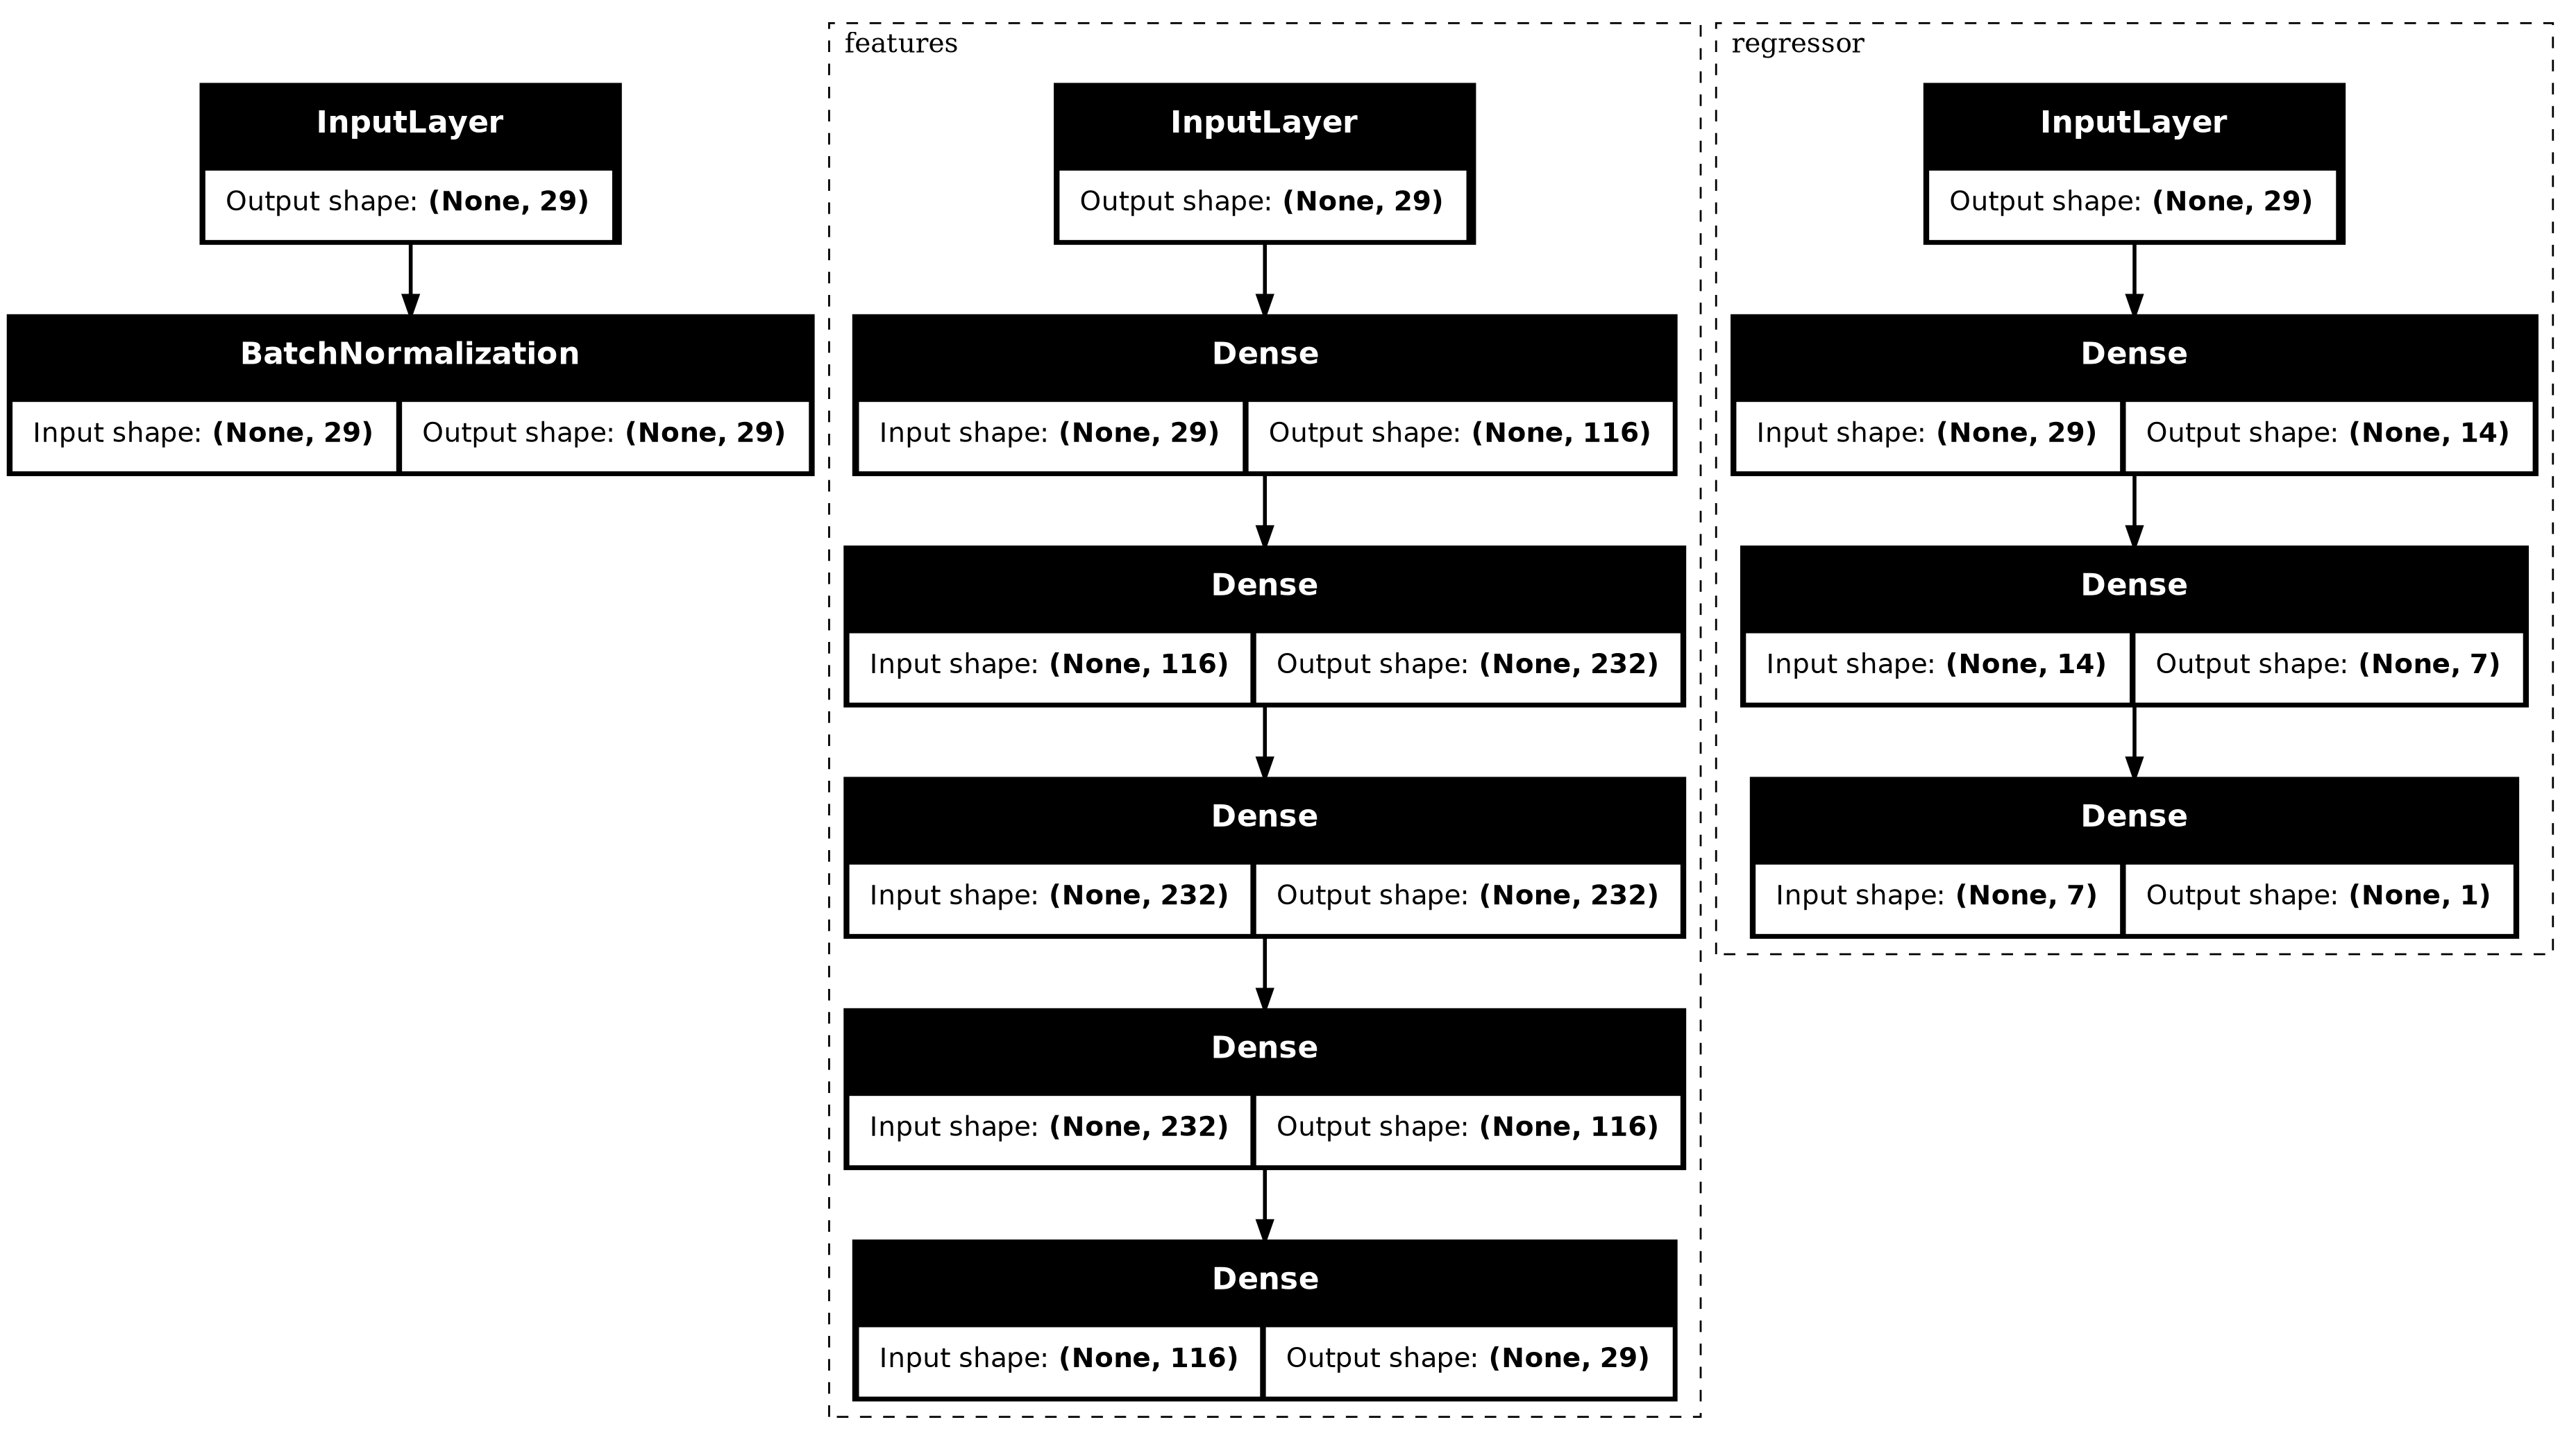

In [42]:
def extrator_features(input_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims*4), activation=activation, use_bias=bias, kernel_regularizer="l2")(input_layer)
  # x_1 = tf.keras.layers.Dropout(0.2)(x_0)
  x_2 = Dense(int(input_dims*8), activation=activation, use_bias=bias)(x_0)
  x_3 = Dense(int(input_dims*8), activation=activation, use_bias=bias)(x_2)
  x_4 = Dense(int(input_dims*4), activation=activation, use_bias=bias)(x_3)
  x_bottleneck = Dense(int(input_dims), activation=activation, name='encoder', use_bias=bias, kernel_regularizer="l1")(x_4)

  return Model(input_layer, x_bottleneck, name="features")

def regressor(input_dims, output_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims/2), activation=activation, use_bias=bias)(input_layer)
  x_2 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_0)
  saidas = Dense(output_dims, activation=None, name='regressor_saidas', use_bias=bias)(x_2)

  return Model(input_layer, saidas, name="regressor")

def build_models(input_dims, output_dims, activation, bias):
  # Camadas de entrada
  input_layer = Input(shape=[input_dims])

  x_n = BatchNormalization()(input_layer)
  # x_n = input_layer

  # Kernels
  extrator = extrator_features(input_dims, activation, bias)

  # Features
  features = extrator(x_n)

  # Regressão
  regressao = regressor(features.shape[1], output_dims, activation, bias)

  saida = regressao(features)
  
  return (
      Model(input_layer, saida, name="regressao"),
      Model(input_layer, features, name="projecao")
  )

model, features = build_models(x_train.shape[1], 1, 'elu', False)
model.compile(optimizer='Adamax', loss='mse', metrics=['mae', 'mse', 'mean_absolute_percentage_error'])
plot_model(model, show_shapes=True, expand_nested=True)

## Treinando o modelo

In [43]:
# Callback para recuperar o melhor peso, e parar quando ficar três épocas sem melhora
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=100, validation_split = 0.2, callbacks=[callback])

Epoch 1/100
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 11.0599 - mae: 2.0449 - mean_absolute_percentage_error: 26.2917 - mse: 8.1396 - val_loss: 5.3997 - val_mae: 1.5795 - val_mean_absolute_percentage_error: 21.4791 - val_mse: 4.4922
Epoch 2/100
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 3s 767us/step - loss: 5.5117 - mae: 1.6301 - mean_absolute_percentage_error: 21.7011 - mse: 4.7324 - val_loss: 4.9762 - val_mae: 1.6258 - val_mean_absolute_percentage_error: 22.5177 - val_mse: 4.4529
Epoch 3/100
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - loss: 5.1036 - mae: 1.6117 - mean_absolute_percentage_error: 21.4017 - mse: 4.6306 - val_loss: 4.7729 - val_mae: 1.5646 - val_mean_absolute_percentage_error: 21.1114 - val_mse: 4.4013
Epoch 4/100
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 3s 772us/step - loss: 4.8492 - mae: 1.5860 - mean_absolute_percentage_error: 21.0671 - mse: 4.5009 - val_loss: 4.5388 - val_mae: 1.5441 - val_mean_absolute_percentage_error: 20.8105 - val_mse: 4.2519
Epoch 5/100
3320/3320 ━━━━━━━

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['rmse'] = np.sqrt(hist['mse'])
hist['val_rmse'] = np.sqrt(hist['val_mse'])
hist.tail()

,loss,mae,mean_absolute_percentage_error,mse,val_loss,val_mae,val_mean_absolute_percentage_error,val_mse,epoch,rmse,val_rmse
67,4.244348,1.525450,20.251898,4.168733,4.069974,1.476894,19.526661,3.995627,67,2.041748,1.998906
68,4.249129,1.527895,20.280420,4.175086,4.134141,1.496483,19.768677,4.060534,68,2.043303,2.015077
69,4.264510,1.530857,20.295029,4.189116,4.068807,1.493156,20.115801,3.992096,69,2.046733,1.998023
70,4.242204,1.526347,20.275730,4.166221,4.091029,1.479125,19.457237,4.015141,70,2.041132,2.003782
71,4.251489,1.529107,20.284498,4.176684,4.069436,1.477564,19.364880,3.997455,71,2.043694,1.999364


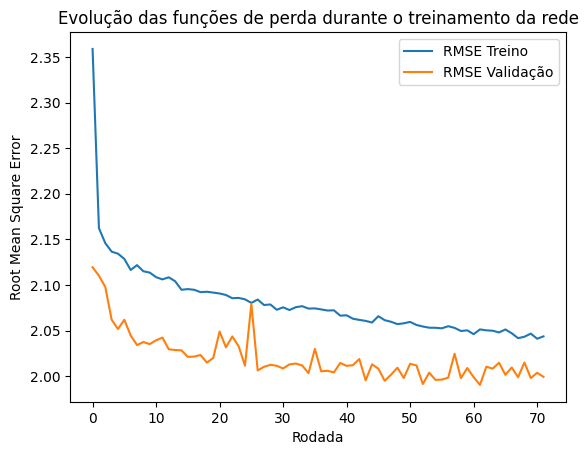

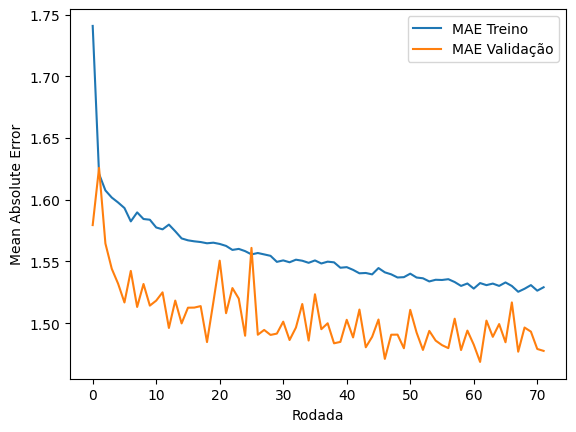

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Evolução das funções de perda durante o treinamento da rede")
plt.xlabel('Rodada')
plt.ylabel('Root Mean Square Error')
plt.plot(hist['epoch'], hist['rmse'], label='RMSE Treino')
plt.plot(hist['epoch'], hist['val_rmse'], label = 'RMSE Validação')
plt.legend()

plt.figure()
plt.xlabel('Rodada')
plt.ylabel('Mean Absolute Error')
plt.plot(hist['epoch'], hist['mae'], label='MAE Treino')
plt.plot(hist['epoch'], hist['val_mae'], label = 'MAE Validação')
plt.legend()

plt.show()

## Avaliando o modelo nos dados de teste

### Ajustando a base de teste

In [46]:
x_test = test
y_test = test.pop('bg+1:00')
print(x_test.shape)
x_test.head(5)

(44256, 29)


,bg-0:00,bg-0:05,bg-0:10,bg-0:15,bg-0:20,bg-0:25,bg-0:30,bg-0:35,bg-0:40,bg-0:45,...,hr-0:20,hr-0:25,hr-0:30,steps-0:00,steps-0:05,steps-0:10,steps-0:15,cals-0:00,cals-0:05,time_circle
2,13.9,0.0,0.0,14.4,0.0,0.0,15.1,0.0,0.0,16.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.657980
10,11.9,0.0,0.0,11.4,0.0,0.0,12.7,0.0,0.0,14.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.015192
21,5.8,0.0,0.0,6.6,0.0,0.0,8.6,0.0,0.0,11.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.699294
27,3.7,7.1,0.0,0.0,5.2,0.0,0.0,4.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.500000
30,12.3,0.0,0.0,0.0,8.0,0.0,0.0,7.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.793353


In [47]:
y_test.head(5)

2     15.5
10    17.4
21     4.8
27    13.1
30     8.3
Name: bg+1:00, dtype: float64

### Prevendo para a base de teste

In [48]:
y_pred = model.predict(x_test)
print(y_pred)

1383/1383 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step
[[12.060128 ]
 [11.137467 ]
 [ 5.961384 ]
 ...
 [ 6.7575293]
 [ 9.056761 ]
 [11.382978 ]]


### Calculando o erro para a base de teste

In [49]:
mse = tf.keras.losses.MSE(y_test, y_pred).numpy().mean()
mae = tf.keras.losses.MAE(y_test, y_pred).numpy().mean()
rmse = np.sqrt(mse)

In [50]:
print(f"RMSE Test: {rmse}")
print(f"MSE Test: {mse}")
print(f"MAE Test: {mae}")

RMSE Test: 1.9882715940475464
MSE Test: 3.953223943710327
MAE Test: 1.4641050100326538


## Salvando o modelo em arquivo

In [51]:
model.save("brist1d_causalidade.keras")